### Data Cleaning: The BOM Dataset 

##### The Box Office Mojo dataset contains movie financial performance data, mainly focusing on box office revenue.To ensure the data is ready for analysis, the following preprocessing steps were performed:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [6]:
data_path = ('../data/zippedData/')

In [7]:
bom = pd.read_csv(data_path + "bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Understanding the Dataset

In [8]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### The dataset has 3387 rows and 5 columns

In [9]:
#checking for datatypes
bom.dtypes


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [ ]:
# Checking for columns in the Dataframe
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

##### Getting the statistical summary of the DataFrame Columns

In [11]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


####  Detecting Missing Values

In [12]:
# Counting missing values per column
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

##### From the dataset information above, we see that two columns has minimal missing values

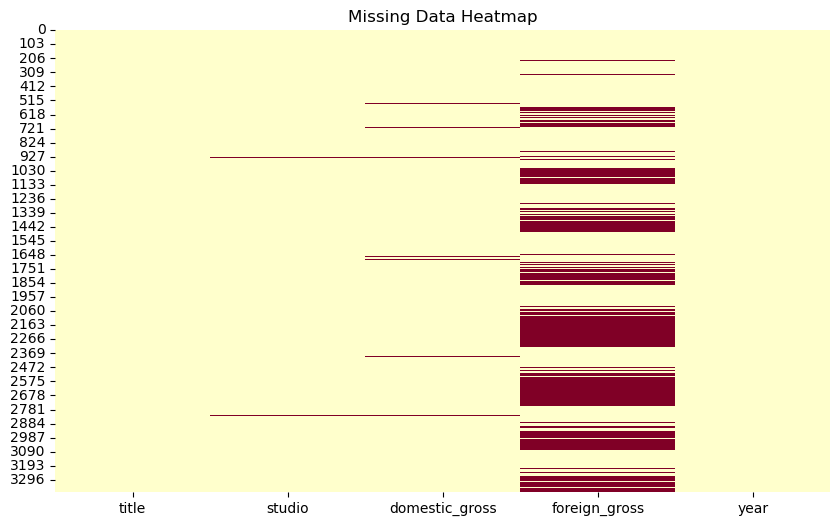

In [13]:
#Plot a heatmap to show missing values

plt.figure(figsize=(10, 6))
sns.heatmap(bom.isnull(), cmap="YlOrRd", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


#### Dropping the rows with minimal missing Values

In [14]:
# Dropping studio and domestic_gross (missing values are minimal)
bom = bom.dropna(subset=['studio','domestic_gross'])

bom = bom.reset_index(drop=True)

In [15]:
#checking how many missing values are in each column of the dataframe bom.
bom.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

##### The studio and domestic gross missing values has been dropped and now we have no missing values in those columns.

### Imputing the columns 

##### Replacing missing values with unknowns for catergorical columns, 0 for Numerical colums and mode for the year column.

In [17]:
# Categorical columns: Title, studio
bom['title'] = bom['title'].fillna('Unknown')
bom['studio'] = bom['studio'].fillna('Unknown')

#Numerical columns: domestic_gross, foreign_gross
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

# Filling the year column with the mode year
bom['year'] = bom['year'].fillna(bom['year'].mode()[0])

bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Dealing with Inconsistencies

#### Checking Inconsistencies in categorical columns

In [18]:
bom["title"].unique().tolist()

['Toy Story 3',
 'Alice in Wonderland (2010)',
 'Harry Potter and the Deathly Hallows Part 1',
 'Inception',
 'Shrek Forever After',
 'The Twilight Saga: Eclipse',
 'Iron Man 2',
 'Tangled',
 'Despicable Me',
 'How to Train Your Dragon',
 'Clash of the Titans (2010)',
 'The Chronicles of Narnia: The Voyage of the Dawn Treader',
 "The King's Speech",
 'Tron Legacy',
 'The Karate Kid',
 'Prince of Persia: The Sands of Time',
 'Black Swan',
 'Megamind',
 'Robin Hood',
 'The Last Airbender',
 'Little Fockers',
 'Resident Evil: Afterlife',
 'Shutter Island',
 'Salt',
 'Sex and the City 2',
 'The Tourist',
 'The Expendables',
 'Grown Ups',
 'Knight & Day',
 'True Grit',
 "Gulliver's Travels",
 'Percy Jackson & The Olympians: The Lightning Thief',
 'The Social Network',
 "Valentine's Day",
 "The Sorcerer's Apprentice",
 'Due Date',
 'Eat Pray Love',
 'Yogi Bear',
 'Red',
 'Paranormal Activity 2',
 'The A-Team',
 'Jackass 3-D',
 'The Other Guys',
 'Unstoppable',
 'Step Up 3-D',
 'The Book of E

In [19]:
bom['studio'].unique().tolist()

['BV',
 'WB',
 'P/DW',
 'Sum.',
 'Par.',
 'Uni.',
 'Fox',
 'Wein.',
 'Sony',
 'FoxS',
 'SGem',
 'WB (NL)',
 'LGF',
 'MBox',
 'CL',
 'W/Dim.',
 'CBS',
 'Focus',
 'MGM',
 'Over.',
 'Mira.',
 'IFC',
 'CJ',
 'NM',
 'SPC',
 'ParV',
 'Gold.',
 'JS',
 'RAtt.',
 'Magn.',
 'Free',
 '3D',
 'UTV',
 'Rela.',
 'Zeit.',
 'Anch.',
 'PDA',
 'Lorb.',
 'App.',
 'Drft.',
 'Osci.',
 'IW',
 'Rog.',
 'Eros',
 'Relbig.',
 'Viv.',
 'Hann.',
 'Strand',
 'NGE',
 'Scre.',
 'Kino',
 'Abr.',
 'CZ',
 'ATO',
 'First',
 'GK',
 'FInd.',
 'NFC',
 'TFC',
 'Pala.',
 'Imag.',
 'NAV',
 'Arth.',
 'CLS',
 'Mont.',
 'Olive',
 'CGld',
 'FOAK',
 'IVP',
 'Yash',
 'ICir',
 'FM',
 'Vita.',
 'WOW',
 'Truly',
 'Indic.',
 'FD',
 'Vari.',
 'TriS',
 'ORF',
 'IM',
 'Elev.',
 'Cohen',
 'NeoC',
 'Jan.',
 'MNE',
 'Trib.',
 'Rocket',
 'OMNI/FSR',
 'KKM',
 'Argo.',
 'SMod',
 'Libre',
 'FRun',
 'WHE',
 'P4',
 'KC',
 'SD',
 'AM',
 'MPFT',
 'Icar.',
 'AGF',
 'A23',
 'Da.',
 'NYer',
 'Rialto',
 'DF',
 'KL',
 'ALP',
 'LG/S',
 'WGUSA',
 'MPI',
 'R

 #### Fixing Inconsistencies

In [20]:
# Fix inconsistencies in categorical columns
bom['studio'] = bom['studio'].str.strip()  # Remove leading/trailing whitespace
bom['title'] = bom['title'].str.strip()  # Standardize capitalization

In [21]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 131.2+ KB


### Changing Data types of columns

##### We change data types to ensure each column is in the correct format so calculations, analysis, and merging work accurately without errors.

In [22]:
bom[bom.select_dtypes(include="float64").columns] = bom[bom.select_dtypes(include="float64").columns].astype("int64")
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3356 non-null   object
 1   studio          3356 non-null   object
 2   domestic_gross  3356 non-null   int64 
 3   foreign_gross   3356 non-null   object
 4   year            3356 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 131.2+ KB


In [23]:
## viewing the first 10 rows after cleaning the data
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010
6,Iron Man 2,Par.,312400000,311500000,2010
7,Tangled,BV,200800000,391000000,2010
8,Despicable Me,Uni.,251500000,291600000,2010
9,How to Train Your Dragon,P/DW,217600000,277300000,2010


##### This is the cleaned data with no missing values, with data types as integer and object, with no inconcistencies

In [24]:
# Saving the cleaned DataFrame to a new CSV file
bom_cleaned = bom.copy()
bom_cleaned.to_csv('../data/cleanedData/bom_cleaned_data.csv', index=False)